# Load in dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("Datasets.csv")

In [16]:
parameters = list(data.columns)
cell_data = data.filter(items=parameters[:-1])

# Image generation

In [33]:
from math import sin, cos, radians

In [87]:
"""
Takes in a Pandas series and generates an image of the re-entrant auxetic
    described by the parameters

Arguments:
* data: Pandas series with 'Slant cell length', 'Cell thickness', 'Cell angle', 
    'Vertical cell length'
* show: False if plot should not be displayed
* save: True if the plot should be saved
* fname: name of the file to save the plot into if save=True
"""
def gen_image(data, show=True, save=False, fname=''):
    # ignoring cell thickness for now
    slant_len = data["Slant cell length"]
    angle = data["Cell angle"]
    height = data["Vertical cell length"]

    # for calculating x and y coordinates of plot lines
    slant_dx = slant_len * cos(radians(90 - angle))
    slant_dy = slant_len * sin(radians(90 - angle))

    # plot point generation
    top = 1 + height
    bottom = 1
    center = 1 + slant_dx
    left = 1
    right = 1 + 2*slant_dx
    # [ [[x values of 1st slant], [y values of 1st slant]], [...], [...], [...] ]
    slants = [
        [[left, center], [bottom, bottom + slant_dy]],
        [[center, right], [bottom + slant_dy, bottom]],
        [[left, center], [top, top - slant_dy]],
        [[center, right],[top - slant_dy, top]]
    ]
    # vertical lines
    verticals = [
        [[left, left], [bottom, top]],
        [[center, center], [bottom + slant_dy, bottom - 0.2*height]],
        [[right, right], [bottom, top]],
        [[center, center], [top - slant_dy, top + 0.2*height]]
    ]

    # plotting and saving
    plt.cla()
    for slant in slants:
        plt.plot(*slant, color='black')
    for line in verticals:
        plt.plot(*line, color='black')
    plt.axis('off')
    
    if save:
        plt.savefig(fname)
    if not show:
        plt.close()

"""
Saves a group of images

Arguments:
* data: Pandas dataframe
* indices: list of indices of rows in the dataframe to
    generate images from
"""
def save_images(data, indices):
    for idx in indices:
        gen_image(data.iloc[idx], show=False, save=True, fname=f'./images/{idx}.png')

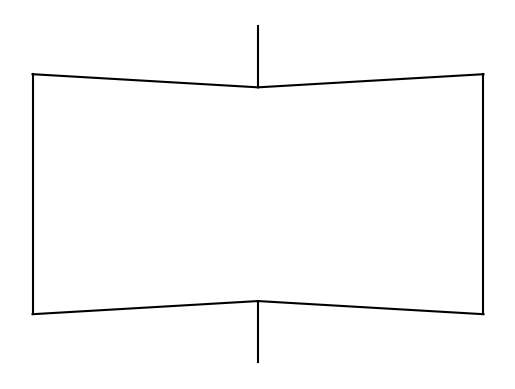

In [84]:
gen_image(data.iloc[5000], save=True, fname='5000.png')
gen_image(data.iloc[0], save=True, fname='0.png')

In [ ]:
save_images(data, [0, 5000])